In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import ipywidgets as widgets
from ipywidgets import RadioButtons
from IPython.display import display, clear_output
from scipy.signal import upfirdn, convolve
from ipywidgets import Checkbox, Button, Output, VBox, HBox, Dropdown, Layout
import time

In [2]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html = widgets.HTML(
  value=loading
)
timer_html = widgets.HTML(
    value="Elapsed time: - seconds"
)

def generate_histogram(k, d):
    # Start timer
    loader_html.value = loading
    start_time = time.time()

    M = 40000
    L = 2 ** k

    x = (2 * np.floor(L * np.random.rand(M)) - L + 1) * d / 2
    bins = np.arange(-L*d/2, L*d/2 + 2*d/2, d)
    A = np.arange(-L*d/2 + d/2, L*d/2, d)
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    ax.hist(x, bins=bins, edgecolor='white', color='#1F77B4')
    ax.set_xticks(A)
    ax.set_xlabel("Integers")
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of array x elements")

    # Show elapsed time
    elapsed_time = time.time() - start_time
    timer_html.value = f"Elapsed time: {elapsed_time:.2f} seconds"
    loader_html.value = done

    plt.show()

# UI Components
k_input = widgets.IntText(
    value=3,  # default value
    description='k:',
    continuous_update=False
)
d_input = widgets.FloatText(
    value=1,  # default value
    description='d:',
    continuous_update=False
)

inputs = widgets.VBox([k_input, d_input])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html, timer_html], layout=widgets.Layout(margin='0 0 0 20px', width='auto'))

ui = widgets.HBox([inputs, loader_timer_box], layout=Layout(align_items='center'))

out = widgets.interactive_output(generate_histogram, {'k': k_input, 'd': d_input})

display(ui, out)


Output()

In [3]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html = widgets.HTML(
  value=loading
)
timer_html = widgets.HTML(
    value="Elapsed time: - seconds"
)

def generate_histogram(k, EbN0_db, d):
    # Start timer
    loader_html.value = loading
    start_time = time.time()

    M = 60000
    nsamp = 16

    L = 2 ** k
    SNR_db = EbN0_db - 10 * np.log10(nsamp / (2 * k))
    SNR = 10 ** (SNR_db * 0.1)
    x = (2 * np.floor(L * np.random.rand(M)) - L + 1) * d / 2
    Px = (d ** 2 / 4) * (L ** 2 - 1) / 3
    Measured_x = np.sum(x ** 2) / len(x)

    y = np.repeat(x, nsamp)

    noise = np.random.normal(0, np.sqrt(Measured_x / SNR), len(y))
    y_noisy = y + noise

    y_reshaped = np.reshape(y_noisy, (M, nsamp))
    matched = np.ones((nsamp, 1))
    z = np.matmul(y_reshaped, matched) / nsamp

    A = np.arange(-(L - 1) * d / 2, L * d / 2, d)  # Correct range for ticks

    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    ax.hist(z, bins=200, edgecolor='white', color='#1F77B4')
    ax.set_xticks(A)
    ax.set_xlabel("Integers")
    ax.set_ylabel("Frequency")
    ax.legend(["Eb/N0 = " + str(EbN0_db)])
    ax.set_title('Histogram of the Noisy Signal')

    # Show elapsed time
    elapsed_time = time.time() - start_time
    timer_html.value = f"Elapsed time: {elapsed_time:.2f} seconds"
    loader_html.value = done

    plt.show()

# UI Components
k_input = widgets.IntText(
    value=3,
    description='k:',
    continuous_update=False
)
d_input = widgets.IntText(
    value=5,
    description='d:',
    continuous_update=False
)
EbN0_db_slider = widgets.FloatSlider(
    value=12,
    min=0,
    max=20,
    step=0.1,
    description='Eb/N0 (dB):',
    continuous_update=False
)



inputs = widgets.VBox([k_input,d_input, EbN0_db_slider])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html, timer_html], layout=widgets.Layout(margin='0 0 0 20px', width='auto'))

ui = widgets.HBox([inputs, loader_timer_box], layout=Layout(align_items='center'))

out = widgets.interactive_output(generate_histogram, {'k': k_input, 'd': d_input, 'EbN0_db': EbN0_db_slider})

display(ui, out)

Output()

In [4]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html = widgets.HTML(
  value=loading
)
timer_html = widgets.HTML(
    value="Elapsed time: - seconds"
)

def ask_errors(k, M, nsamp, EbN0_db):
    L = 2**k
    SNR_db = EbN0_db - 10*np.log10(nsamp/(2*k))
    SNR = 10 ** (SNR_db * 0.1)
    x = 2 * np.floor(L * np.random.rand(M)) - L + 1
    P_x = (L**2 - 1) / 3
    Measured_x = np.sum(x**2) / len(x)

    y = []
    for i in range(len(x)):
        y.extend([x[i]] * nsamp)
    y = np.array(y)

    noise = np.random.normal(0, np.sqrt(Measured_x / SNR), len(y))
    y_noisy = y + noise

    y = np.reshape(y_noisy, (M, nsamp))
    matched = np.ones((nsamp, 1))
    z = np.matmul(y, matched) / nsamp
    l = np.arange(-L+1, L, 2)

    z = z[:, 0]
    errors = 0
    for i in range(len(z)):
        differences = np.abs(l - z[i])
        m = np.min(differences)
        index = np.where(differences == m)[0][0]
        z[i] = l[index]
        if x[i] != z[i]:
            errors += 1
    
    return errors

# Update Eb/N0 dB range to go up to 20 dB
M = 20000
nsamp = 16
EbN0_db = np.arange(0, 21, 2)  # Now goes up to 20 dB
EbN0 = 10 ** (EbN0_db / 10)

# Define the checkboxes for each modulation level
checkbox_4qam = Checkbox(value=True, description='4-ASK')
checkbox_8qam = Checkbox(value=False, description='8-ASK')
checkbox_16qam = Checkbox(value=False, description='16-ASK')

plot_output = Output()

def plot_selected_modulations(change):
    # Start timer
    loader_html.value = loading
    start_time = time.time()

    with plot_output:
        plot_output.clear_output(wait=True)
        plt.figure(figsize=(10, 7))
        colors = {'4-ASK': ('red', 'tomato'), '8-ASK': ('green', 'limegreen'), '16-ASK': ('blue', 'dodgerblue')}
        
        for k, checkbox in zip([2, 3, 4], [checkbox_4qam, checkbox_8qam, checkbox_16qam]):
            if checkbox.value:
                L = 2**k
                modulation_name = f'{L}-ASK'
                ber = [ask_errors(k, M, nsamp, db) / M / np.log2(L) for db in EbN0_db]
                plt.semilogy(EbN0_db, ber, 'o', label=f'Experimental {modulation_name}', color=colors[modulation_name][0])
                
                # Update theoretical BER calculation
                ber_theoretical = (((L - 1) / L) * erfc(np.sqrt(EbN0 * (3 * np.log2(L)) / (L**2 - 1)))) / k
                plt.semilogy(EbN0_db, ber_theoretical, linestyle='-', label=f'Theoretical {modulation_name}', color=colors[modulation_name][1])

        plt.grid(True, which='both')
        plt.xlabel("Eb/N0 (dB)")
        plt.ylabel("BER")
        plt.legend()
        plt.title('Theoretical and Experimental BER of ask_errors')

        # Show elapsed time
        elapsed_time = time.time() - start_time
        timer_html.value = f"Elapsed time: {elapsed_time:.2f} seconds"
        loader_html.value = done

        plt.show()

# Attach the update_plot function to the 'value' property of each checkbox
checkbox_4qam.observe(plot_selected_modulations, names='value')
checkbox_8qam.observe(plot_selected_modulations, names='value')
checkbox_16qam.observe(plot_selected_modulations, names='value')

inputs = widgets.VBox([checkbox_4qam, checkbox_8qam, checkbox_16qam])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html, timer_html], layout=widgets.Layout(margin='0 0 0 20px', width='auto'))

ui = widgets.HBox([inputs, loader_timer_box], layout=Layout(align_items='center'))

# Setup the display layout
display(ui, plot_output)

# Display the initial plot
plot_selected_modulations(None)

Output()

In [5]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html = widgets.HTML(
  value=loading
)
timer_html = widgets.HTML(
    value="Elapsed time: - seconds"
)

def ask_errors_new(k, M, nsamp, EbN0_db):
    # Constants and signal generation
    L = 2**k
    SNR_db = EbN0_db - 10 * np.log10(nsamp / (2 * k))
    x = 2 * np.floor(L * np.random.rand(M)) - L + 1

    # Filter impulse response: orthogonal pulse of unit energy
    h = np.ones(nsamp) / np.sqrt(nsamp)

    # Upsample x
    y_upsampled = np.zeros(M * nsamp)
    y_upsampled[::nsamp] = x

    # Convolution with the filter impulse response
    y = np.convolve(y_upsampled, h, mode='full')[:M*nsamp]

    # Filter impulse response: orthogonal pulse of unit energy

    # Add AWGN
    signal_power = np.mean(y**2)
    SNR_linear = 10**(SNR_db / 10)
    noise_power = signal_power / SNR_linear
    # Correctly define y_noisy
    noise = np.random.normal(0, np.sqrt(noise_power), y.shape)
    y_noisy = y + noise  # This should correctly define y_noisy

    # Matched filter
    matched = h[::-1]
    yrx = np.convolve(y_noisy, matched, mode='full')  # Make sure to use y_noisy here

    # Sampling at the end of each symbol period
    z = yrx[nsamp-1::nsamp][:M]  # Ensure we only get M samples



    # Decision making
    l = np.arange(-L + 1, L, 2)
    z_decoded = np.zeros(M, dtype=int)
    for i in range(M):
        index = np.argmin(np.abs(l - z[i]))
        z_decoded[i] = l[index]

    # Count errors
    errors = np.sum(x != z_decoded)

    return errors



M = 20000
EbN0_db = np.arange(0, 21, 2)

# Initialize the widgets
checkbox_4qam1 = Checkbox(value=True, description='4-ASK')
checkbox_8qam1 = Checkbox(value=False, description='8-ASK')
checkbox_16qam1 = Checkbox(value=False, description='16-ASK')
nsamp_dropdown1 = Dropdown(options=[4, 8, 16, 32, 64], value=16, description='Samples per Symbol:', style={'description_width': 'initial'})

plot_output1 = Output()

def plot_selected_modulations1(change):
    # Start timer
    loader_html.value = loading
    start_time = time.time()

    with plot_output1:
        plot_output1.clear_output(wait=True)
        nsamp = nsamp_dropdown1.value  # Get the selected value from the dropdown
        plt.figure(figsize=(10, 7))
        
        # Define colors for each modulation level
        colors = {
            '4-ASK': 'red',
            '8-ASK': 'green',
            '16-ASK': 'blue'
        }
        
        for k, checkbox, color in zip([2, 3, 4], [checkbox_4qam1, checkbox_8qam1, checkbox_16qam1], colors.values()):
            if checkbox.value:
                L = 2**k
                modulation_name = f'{L}-ASK'
                ber = np.zeros(len(EbN0_db))
                for index, eb_n0 in enumerate(EbN0_db):
                    # Simulate experimental BER
                    ber[index] = ask_errors_new(k, M, nsamp, eb_n0) / (M * np.log2(L))
                
                # Plot experimental BER
                plt.semilogy(EbN0_db, ber, 'o', label=f'Experimental {modulation_name}', color=color)
                
                # Theoretical BER for comparison
                ber_theoretical = (((L-1)/L) * erfc(np.sqrt(10**(EbN0_db / 10) * (3 * np.log2(L)) / (L**2 - 1)))) / k
                plt.semilogy(EbN0_db, ber_theoretical, linestyle='-', label=f'Theoretical {modulation_name}', color=color)
        
        plt.grid(True, which='both')
        plt.xlabel("Eb/N0 (dB)")
        plt.ylabel("BER")
        plt.title(f'Theoretical and Experimental BER of modified ask_errors [nsamp={nsamp}]')
        plt.legend()
        
        # Show elapsed time
        elapsed_time = time.time() - start_time
        timer_html.value = f"Elapsed time: {elapsed_time:.2f} seconds"
        loader_html.value = done

        plt.show()

# Attach the update function to observe changes in checkboxes and dropdown
checkbox_4qam1.observe(plot_selected_modulations1, names='value')
checkbox_8qam1.observe(plot_selected_modulations1, names='value')
checkbox_16qam1.observe(plot_selected_modulations1, names='value')
nsamp_dropdown1.observe(plot_selected_modulations1, names='value')

inputs  = widgets.VBox([nsamp_dropdown1, checkbox_4qam1, checkbox_8qam1, checkbox_16qam1])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html, timer_html], layout=widgets.Layout(margin='0 0 0 20px', width='auto'))

ui = widgets.HBox([inputs, loader_timer_box], layout=Layout(align_items='center'))

# Display the widgets and the output container
display(ui, plot_output1)

# Call the function initially to display the plot
plot_selected_modulations1(None)

Output()

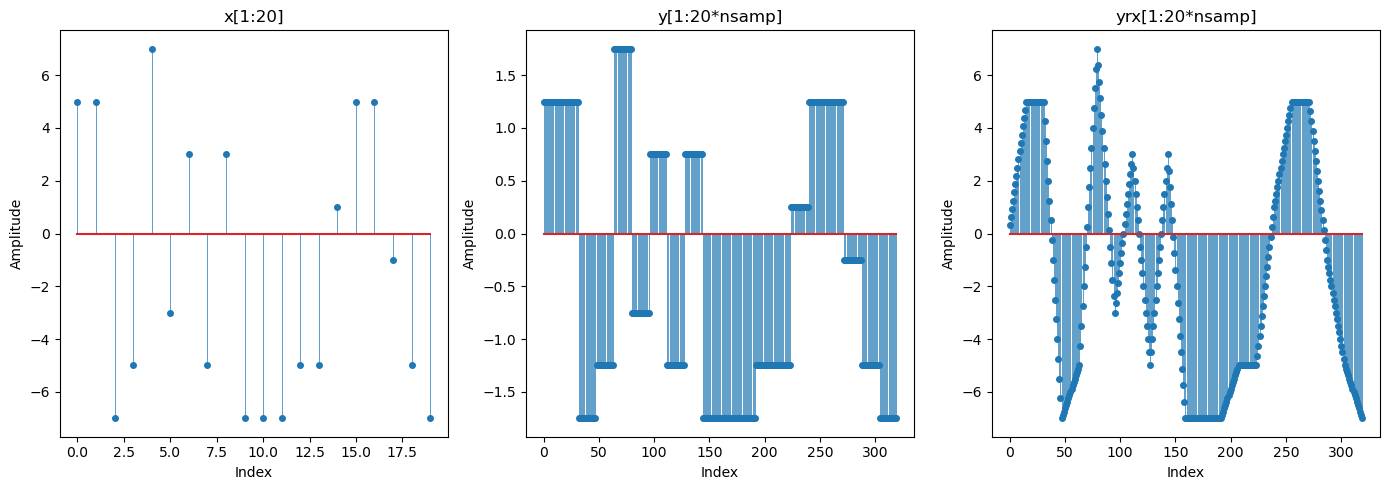

In [6]:
def ask_errors_modified(k, M, nsamp, add_noise=False):
    L = 2**k
    x = 2 * np.floor(L * np.random.rand(M)) - L + 1

    # Create the filter impulse response
    h = np.ones(nsamp) / np.sqrt(nsamp)

    # Sender side: upsample and then convolve (filter) the signal
    y = upfirdn(h, x, up=nsamp)
    y = y[:M * nsamp]  # Cutting the last elements of convolution if any

    # Optionally add noise
    y_noisy = y
    if add_noise:
        SNR_db = 10  # Example SNR value, adjust as necessary
        SNR_linear = 10 ** (SNR_db / 10)
        P_x = np.mean(y ** 2)  # Signal power
        noise_variance = P_x / SNR_linear
        noise = np.random.normal(0, np.sqrt(noise_variance), len(y))
        y_noisy = y + noise

    # Receiver side: matched filtering
    matched = h[::-1]  # Matched filter is a time-reversed version of h
    yrx = convolve(y_noisy, matched, mode='full')
    yrx = yrx[:M * nsamp]  # Adjust length to match y

    # Returning slices for visualization
    return x[:20], y[:20*nsamp], yrx[:20*nsamp]


import matplotlib.pyplot as plt

k=3
# Get the signal parts
x_part, y_part, yrx_part = ask_errors_modified(k, M, nsamp, add_noise=False)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# Plot x
markerline, stemlines, baseline = axs[0].stem(x_part)
plt.setp(stemlines, 'linewidth', 0.5)  # Set the stem lines' width
plt.setp(markerline, 'markersize', 4)  # Set the marker size
axs[0].set_title('x[1:20]')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Amplitude')

# Plot y
markerline, stemlines, baseline = axs[1].stem(y_part)
plt.setp(stemlines, 'linewidth', 0.5)  # Set the stem lines' width
plt.setp(markerline, 'markersize', 4)  # Set the marker size
axs[1].set_title('y[1:20*nsamp]')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Amplitude')

# Plot yrx
markerline, stemlines, baseline = axs[2].stem(yrx_part)
plt.setp(stemlines, 'linewidth', 0.5)  # Set the stem lines' width
plt.setp(markerline, 'markersize', 4)  # Set the marker size
axs[2].set_title('yrx[1:20*nsamp]')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Amplitude')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html = widgets.HTML(
  value=loading
)
timer_html = widgets.HTML(
    value="Elapsed time: - seconds"
)

def ask_errors_sin_wrong(k, M, nsamp, EbN0_db, matched_filter_type='Normal'):
    L = 2**k
    SNR_db = EbN0_db - 10 * np.log10(nsamp / (2 * k))
    SNR_linear = 10 ** (SNR_db / 10)
    x = 2 * np.floor(L * np.random.rand(M)) - L + 1

    h = np.cos(2 * np.pi * np.arange(1, nsamp + 1) / nsamp)
    h = h / np.sqrt(np.sum(h**2))

    y = upfirdn(h, x, up=nsamp)
    y = y[:M * nsamp]

    P_x = np.mean(y ** 2)
    noise_variance = P_x / SNR_linear
    noise = np.random.normal(0, np.sqrt(noise_variance), len(y))
    y_noisy = y + noise

    matched = h[::-1] if matched_filter_type == 'Reversed' else h
    yrx = np.convolve(y_noisy, matched, mode='full')
    z = yrx[nsamp - 1:M * nsamp:nsamp]

    levels = np.arange(-L + 1, L, 2)
    z_decided = levels[np.abs(levels[:, None] - z).argmin(axis=0)]

    errors = np.count_nonzero(x != z_decided)

    return errors

matched_radio = RadioButtons(
    options=['Normal', 'Reversed'],
    value='Normal',
    description='Matched Filter:',
    disabled=False
)

M = 20000
EbN0_db = np.arange(0, 21, 2)

checkbox_4qam4 = Checkbox(value=True, description='4-ASK')
checkbox_8qam4 = Checkbox(value=False, description='8-ASK')
checkbox_16qam4 = Checkbox(value=False, description='16-ASK')
nsamp_dropdown4 = Dropdown(options=[4, 8, 16, 32, 64], value=16, description='Samples per Symbol:', style={'description_width': 'initial'})

plot_output4 = Output()

def plot_selected_modulations4(change):
    # Start timer
    loader_html.value = loading
    start_time = time.time()

    with plot_output4:
        plot_output4.clear_output(wait=True)
        nsamp = nsamp_dropdown4.value
        matched_filter_type = matched_radio.value
        plt.figure(figsize=(10, 7))
        colors = {'4-ASK': 'red', '8-ASK': 'green', '16-ASK': 'blue'}

        for k, checkbox, color in zip([2, 3, 4], [checkbox_4qam4, checkbox_8qam4, checkbox_16qam4], colors.values()):
            if checkbox.value:
                L = 2**k
                modulation_name = f'{L}-ASK'
                ber = np.zeros(len(EbN0_db))
                for index, eb_n0 in enumerate(EbN0_db):
                    ber[index] = ask_errors_sin_wrong(k, M, nsamp, eb_n0, matched_filter_type) / (M * np.log2(L))

                plt.semilogy(EbN0_db, ber, 'o', label=f'Experimental {modulation_name}', color=color)
                ber_theoretical = (((L-1)/L) * erfc(np.sqrt(10**(EbN0_db / 10) * (3 * np.log2(L)) / (L**2 - 1)))) / k
                plt.semilogy(EbN0_db, ber_theoretical, linestyle='-', label=f'Theoretical {modulation_name}', color=color)

        plt.grid(True, which='both')
        plt.xlabel("Eb/N0 (dB)")
        plt.ylabel("BER")
        plt.title(f'Theoretical and Experimental BER of ASK Modulations [nsamp={nsamp}]')
        plt.legend()
            
        # Show elapsed time
        elapsed_time = time.time() - start_time
        timer_html.value = f"Elapsed time: {elapsed_time:.2f} seconds"
        loader_html.value = done

        plt.show()

# Attach the update_plots function to observe changes in checkboxes, dropdown, and radio buttons
checkbox_4qam4.observe(plot_selected_modulations4, names='value')
checkbox_8qam4.observe(plot_selected_modulations4, names='value')
checkbox_16qam4.observe(plot_selected_modulations4, names='value')
nsamp_dropdown4.observe(plot_selected_modulations4, names='value')
matched_radio.observe(plot_selected_modulations4, names='value')

inputs1 = widgets.HBox([nsamp_dropdown4])
inputs2 = widgets.HBox([matched_radio], layout = Layout(margin = "0 0 0 20px"))
inputs12 = widgets.HBox([inputs1, inputs2], layout=Layout(align_items='center'))
inputs3 = widgets.VBox([checkbox_4qam4, checkbox_8qam4, checkbox_16qam4])

inputs = widgets.VBox([inputs12,inputs3])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html, timer_html])

ui = widgets.HBox([inputs, loader_timer_box], layout=Layout(align_items='center'))

display(ui, plot_output4)

plot_selected_modulations4(None)

Output()

In [8]:
# Loading animation
loading = """
    <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
        <div class='loader' style='border: 12px solid #f3f3f3; /* Light grey */
                                     border-top: 12px solid #01cc97; /* Blue */
                                     border-radius: 50%;
                                     width: 40px;
                                     height: 40px;
                                     animation: spin 2s linear infinite;'></div>
    </div>
    <style>
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    </style>
    """
done = """
        <div style='display: flex; justify-content: center; align-items: center; height: 80px;'>
            <div style='font-size: 40px; color: #01cc97;'>&#10003;</div>
        </div>
        """
loader_html = widgets.HTML(
  value=loading
)
timer_html = widgets.HTML(
    value="Elapsed time: - seconds"
)

# Adjusted function to plot filters
def plot_filters(change):
    # Start timer
    loader_html.value = loading
    start_time = time.time()
    nsamp = nsamp_input.value

    with output:
        output.clear_output(wait=True)
        orthogonal = np.ones(nsamp) / np.sqrt(nsamp)
        sinusoidal = np.cos(2 * np.pi * np.arange(1, nsamp + 1) / nsamp)
        sinusoidal = sinusoidal / np.sqrt(np.sum(sinusoidal**2))

        matched_orthogonal = orthogonal[::-1]
        matched_sinusoidal = sinusoidal[::-1]

        fig, axs = plt.subplots(2, 2, figsize=(14, 8))

        markerline, stemlines, baseline = axs[0,0].stem(orthogonal)
        plt.setp(stemlines, 'linewidth', 0.5)
        plt.setp(markerline, 'markersize', 4)
        axs[0,0].set_title('Orthogonal')
        axs[0,0].set_xlabel('Index')
        axs[0,0].set_ylabel('Amplitude')

        markerline, stemlines, baseline = axs[0,1].stem(sinusoidal)
        plt.setp(stemlines, 'linewidth', 0.5)
        plt.setp(markerline, 'markersize', 4)
        axs[0,1].set_title('Sinusoidal')
        axs[0,1].set_xlabel('Index')
        axs[0,1].set_ylabel('Amplitude')

        markerline, stemlines, baseline = axs[1,0].stem(matched_orthogonal)
        plt.setp(stemlines, 'linewidth', 0.5)
        plt.setp(markerline, 'markersize', 4)
        axs[1,0].set_title('Matched Orthogonal')
        axs[1,0].set_xlabel('Index')
        axs[1,0].set_ylabel('Amplitude')

        markerline, stemlines, baseline = axs[1,1].stem(matched_sinusoidal)
        plt.setp(stemlines, 'linewidth', 0.5)
        plt.setp(markerline, 'markersize', 4)
        axs[1,1].set_title('Matched Sinusoidal')
        axs[1,1].set_xlabel('Index')
        axs[1,1].set_ylabel('Amplitude')

        plt.tight_layout()

        # Show elapsed time
        elapsed_time = time.time() - start_time
        timer_html.value = f"Elapsed time: {elapsed_time:.2f} seconds"
        loader_html.value = done

        plt.show()

# Widget UI components with Dropdown
nsamp_input = widgets.Dropdown(
    options=[8, 16, 32, 64],
    value=8,  # Default value
    description='nsamp:',
)

output = widgets.Output()

nsamp_input.observe(plot_filters, names='value')

inputs = widgets.VBox([nsamp_input])

# Group the loader and timer together (they will appear next to each other horizontally)
loader_timer_box = widgets.VBox([loader_html, timer_html], layout=widgets.Layout(margin='0 0 0 20px', width='auto'))

ui = widgets.HBox([inputs, loader_timer_box], layout=Layout(align_items='center'))

out = widgets.VBox([ui, output])

# Display UIA
display(out)

# Initial plot to show when the page loads
plot_filters(None)
